# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Let examine the shape of my data

In [9]:
client_df.shape, price_df.shape

((14606, 26), (193002, 8))

Let Examine the numerical features

In [10]:
numerical_features = client_df.select_dtypes(include=[np.number])
numerical_features.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn'],
      dtype='object')

Let examine the category features

In [11]:
category_features = client_df.select_dtypes(include=[np.object])
category_features.columns

C:\Users\HP\AppData\Local\Temp\ipykernel_14296\2165685970.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  category_features = client_df.select_dtypes(include=[np.object])


Index(['id', 'channel_sales', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'has_gas', 'origin_up'],
      dtype='object')

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

visualize the missing values

<AxesSubplot:>

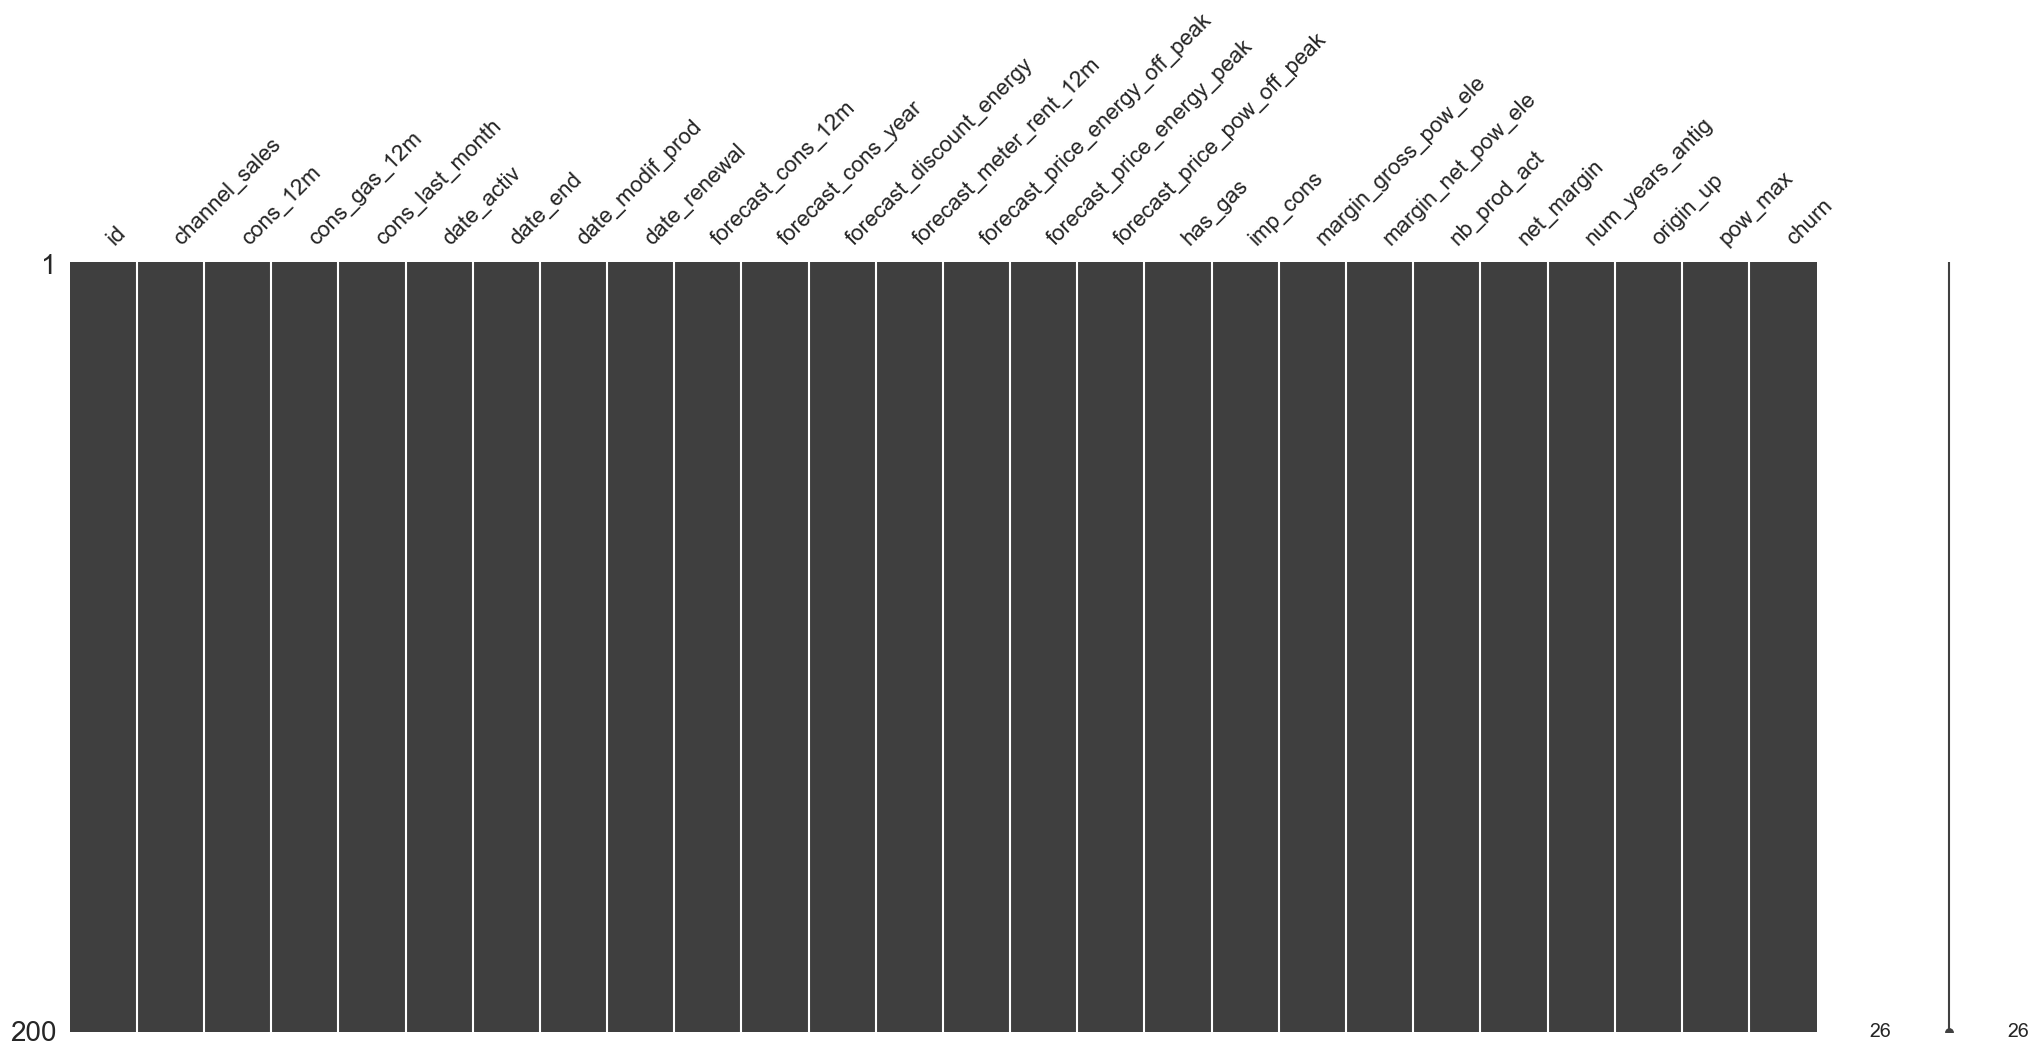

In [12]:
msno.matrix(client_df.sample(200))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


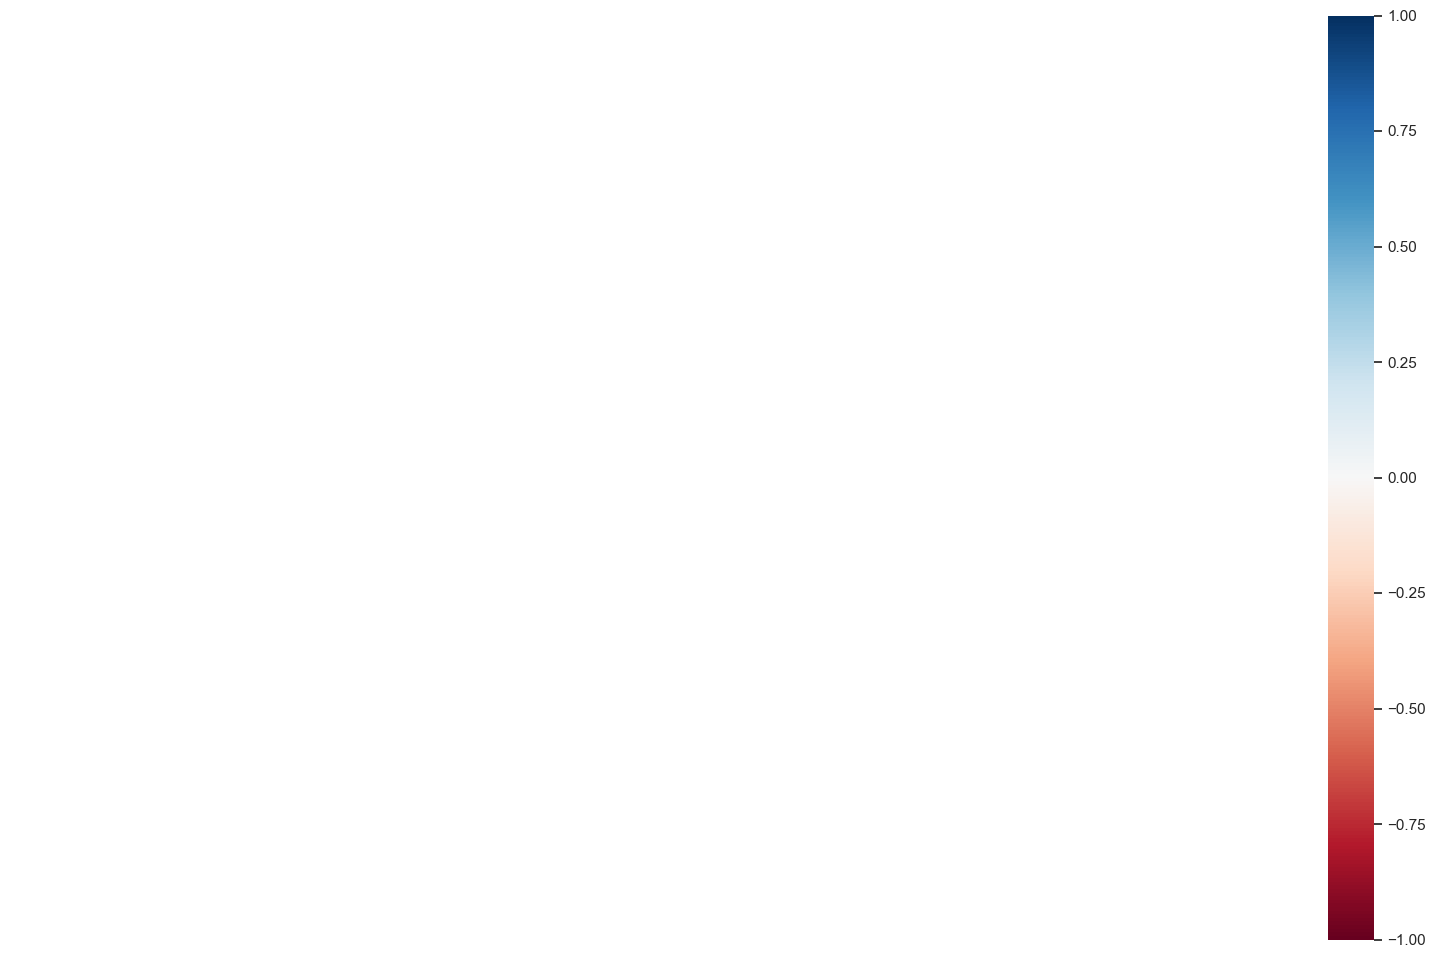

In [13]:
msno.heatmap(client_df);

Based on the above chart it indicate we dont have any missing values in our dataset

In [14]:
#Replace f and t with False and True Set the column as type bool        
client_df['has_gas'] = client_df['has_gas'].replace({'f':False,'t':True}).astype('bool')

In [15]:
# change the date to datetime format
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'])
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

### Let check the distrubution of electric consumption and gas consumption for the past 12 month

In [16]:
stats_cons_12m = client_df['cons_12m'].describe()
print(stats_cons_12m)

cons_gas_12m = client_df['cons_gas_12m'].describe()
print(cons_gas_12m)


count    1.460600e+04
mean     1.592203e+05
std      5.734653e+05
min      0.000000e+00
25%      5.674750e+03
50%      1.411550e+04
75%      4.076375e+04
max      6.207104e+06
Name: cons_12m, dtype: float64
count    1.460600e+04
mean     2.809238e+04
std      1.629731e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.154590e+06
Name: cons_gas_12m, dtype: float64


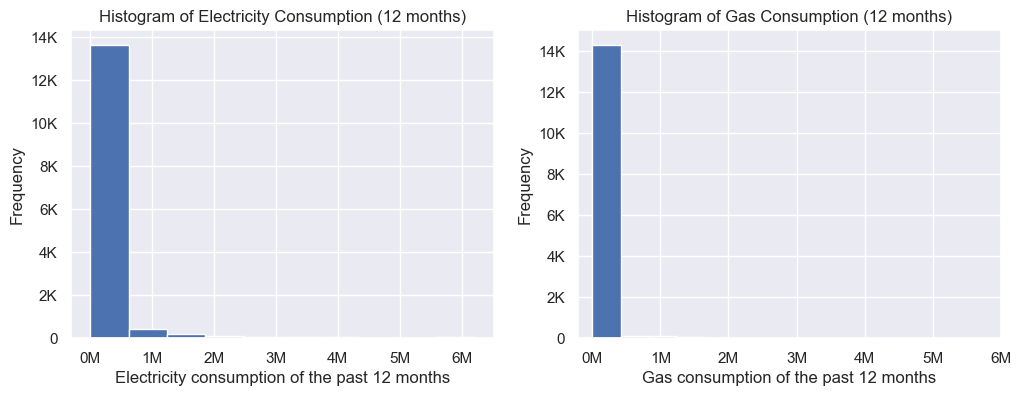

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.hist(client_df['cons_12m'],
         orientation='vertical', 
         histtype='bar', color='b')
# Adding readable x-axis ranges
ax1.set_xticks(range(0, 7000000, 1000000), ['0M', '1M', '2M', '3M', '4M', '5M', '6M'])

# Adding readable y-axis ranges
ax1.set_yticks(range(0, 16000, 2000), ['0', '2K', '4K', '6K', '8K', '10K', '12K', '14K'])

ax1.set_xlabel('Electricity consumption of the past 12 months')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Electricity Consumption (12 months)')

ax2.hist(client_df['cons_gas_12m'],
         orientation='vertical', 
         histtype='bar', color='b')
# Adding readable x-axis ranges
ax2.set_xticks(range(0, 7000000, 1000000), ['0M', '1M', '2M', '3M', '4M', '5M', '6M'])

# Adding readable y-axis ranges
ax2.set_yticks(range(0, 16000, 2000), ['0', '2K', '4K', '6K', '8K', '10K', '12K', '14K'])

ax2.set_xlabel('Gas consumption of the past 12 months')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Gas Consumption (12 months)')


plt.show()

Based on this distribution, we can make a few observations:

The majority of clients have relatively low electricity consumption over the past 12 months, as indicated by the high frequency in the lower intervals.

There are a few clients with very high electricity consumption, as indicated by the low frequency in the higher intervals.

The distribution is right-skewed, which means that there are relatively few clients with very high consumption, while the majority have lower consumption values.

count     14606.000000
mean      16090.269752
std       64364.196422
min           0.000000
25%           0.000000
50%         792.500000
75%        3383.000000
max      771203.000000
Name: cons_last_month, dtype: float64


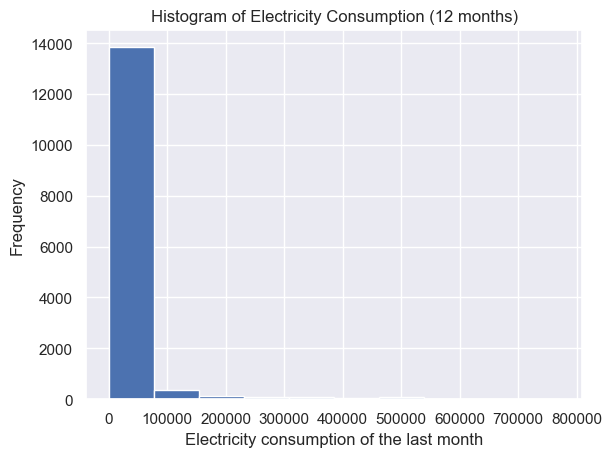

In [18]:
print(client_df['cons_last_month'].describe())
plt.hist(client_df['cons_last_month'], orientation='vertical', histtype='bar',color='b' )
plt.xlabel('Electricity consumption of the last month')
plt.ylabel('Frequency')
plt.title('Histogram of Electricity Consumption (12 months)');

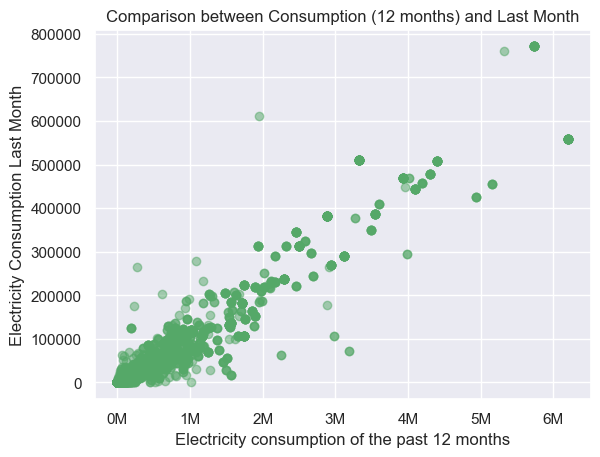

In [19]:
# We can compare 'cons_last_month' with other relevant variables here.
plt.scatter(client_df['cons_12m'], client_df['cons_last_month'], color='g', alpha=0.5)
plt.xlabel('Electricity consumption of the past 12 months')
plt.ylabel('Electricity Consumption Last Month')
plt.title('Comparison between Consumption (12 months) and Last Month')
plt.xticks(range(0, 7000000, 1000000), ['0M', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.show()

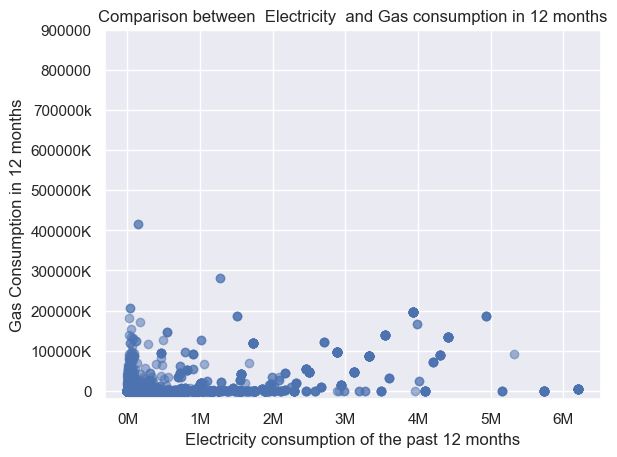

In [20]:
# Comparing with 'cons_12m'
plt.scatter(client_df['cons_12m'], client_df['cons_gas_12m'], color='b', alpha=0.5)
plt.yticks(range(0, 10000000, 1000000), ['0', '100000K', '200000K', '300000K', '400000K', '500000K', '600000K','700000k','800000','900000'])
plt.xticks(range(0, 7000000, 1000000), ['0M', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.xlabel('Electricity consumption of the past 12 months')
plt.ylabel('Gas Consumption in 12 months')
plt.title('Comparison between  Electricity  and Gas consumption in 12 months')
plt.show()

### Calculate Churn Rate:

In [21]:
# Feature Engineering (Grouping by Month)
client_df['activation_month'] = client_df['date_activ'].dt.to_period('M')

# 3. Calculate Churn Rate
churn_rate_by_activation = client_df.groupby('activation_month')['churn'].mean() * 100
print(churn_rate_by_activation)

activation_month
2003-05     0.000000
2003-06    33.333333
2003-07     0.000000
2003-08     0.000000
2003-09     0.000000
             ...    
2013-07    10.526316
2013-08    28.571429
2013-10     0.000000
2013-11    50.000000
2014-09     0.000000
Freq: M, Name: churn, Length: 123, dtype: float64


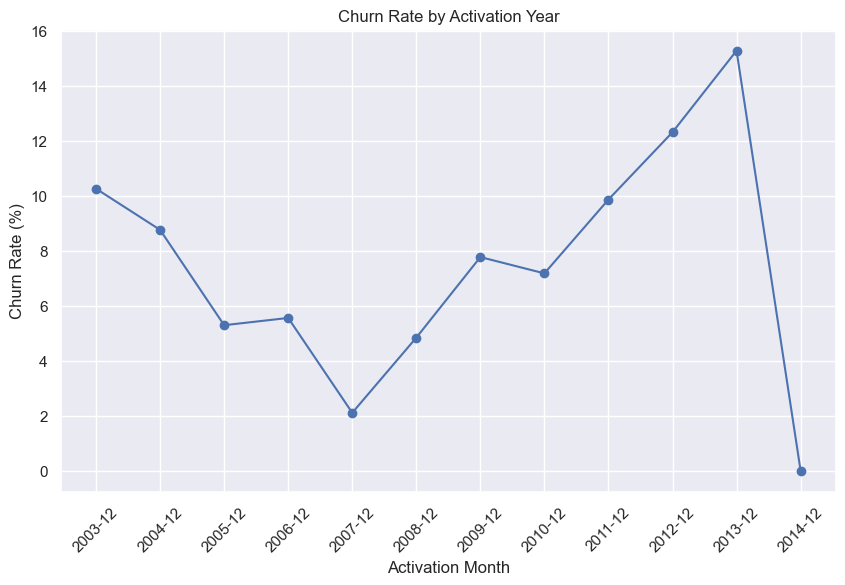

In [22]:
# 2. Feature Engineering (Grouping by Year)
client_df['activation_month'] = client_df['date_activ'].dt.to_period('Y').dt.strftime('%Y-%m')

# 3. Calculate Churn Rate
churn_rate_by_activation = client_df.groupby('activation_month')['churn'].mean() * 100

# 4. Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(churn_rate_by_activation.index, churn_rate_by_activation.values, marker='o', color='b')
plt.xlabel('Activation Month')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Activation Year')
plt.xticks(rotation=45)
plt.grid(True)

plt.show();

### Are there any noticeable trends in churn based on the renewal dates

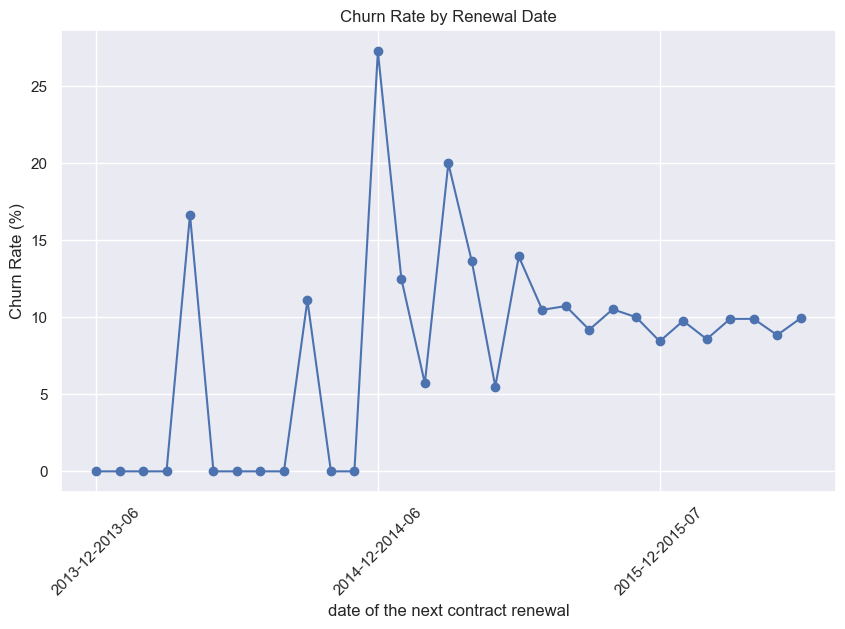

In [23]:
# Group by Month and Year and calculate the mean of 'churn'
client_df['renewal_year'] = client_df['date_renewal'].dt.to_period('Y').dt.strftime('%Y-%m')
client_df['renewal_month'] = client_df['date_renewal'].dt.to_period('M').dt.strftime('%Y-%m')
churn_by_renewal = client_df.groupby(['renewal_year', 'renewal_month'])['churn'].mean()

# Convert to a Series
churn_by_renewal = churn_by_renewal.reset_index()

# Calculate Churn Rate
churn_by_renewal['churn'] = churn_by_renewal['churn'] * 100  # Multiply by 100 for percentage

# Plot the Churn Rate
plt.figure(figsize=(10, 6))
plt.plot(churn_by_renewal.index, churn_by_renewal['churn'], marker='o', color='b')
plt.xlabel('date of the next contract renewal')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Renewal Date')
plt.grid(True)

# Adding readable x-axis ranges with 1-year interval
plt.xticks(range(0, len(churn_by_renewal), 12), ['{}-{}'.format(year, month) for year, month in zip(churn_by_renewal['renewal_year'], churn_by_renewal['renewal_month'])][::12], rotation=45)

plt.show();

In [24]:
# Merge the client data with the pricing data using the 'id' column
merged_data = pd.merge(client_df, price_df, on='id', how='inner')

# Define price sensitivity tiers 
price_ranges = {
    'low': (0, price_df['price_mid_peak_var'].mean()),      # Define low price range
    'medium': (price_df['price_mid_peak_var'].mean(), price_df['price_peak_var'].mean()), # Define medium price range
    'high': (price_df['price_peak_var'].mean(), price_df['price_off_peak_var'].mean()) # Define high price range
}

# Create a new column 'price_sensitivity' based on price range
def get_price_sensitivity(row):
    for sensitivity, (min_price, max_price) in price_ranges.items():
        if min_price <= row['price_off_peak_var'] <= max_price:
            return sensitivity

# Apply the function to create 'price_sensitivity' column
merged_data['price_sensitivity'] = merged_data.apply(get_price_sensitivity, axis=1)

# Calculate churn rate for each price sensitivity tier
churn_rate_by_sensitivity = merged_data.groupby('price_sensitivity')['churn'].mean()

# Print the churn rate for each tier
print(churn_rate_by_sensitivity)


price_sensitivity
high    0.11306
low     0.01000
Name: churn, dtype: float64


### Price Sensitivity Categories:

High: This category represents customers who are highly sensitive to pricing. They are more likely to churn if they perceive prices to be too high.

Low: This category represents customers who have low sensitivity to pricing. They are less likely to churn due to price changes.
Churn Probability for Each Category:

For the 'high' price sensitivity category, the churn probability is approximately 11.31%. This means that around 11.31% of the customers who are highly sensitive to pricing are predicted to churn.

For the 'low' price sensitivity category, the churn probability is 1.00%. This means that around 1.00% of the customers with low sensitivity to pricing are predicted to churn.

These figures indicate the likelihood of churn for customers in different price sensitivity categories. Customers who are highly sensitive to prices are more likely to churn compared to those with low price sensitivity. This information can be valuable for businesses to develop targeted strategies to retain customers, especially those in the 'high' price sensitivity category.

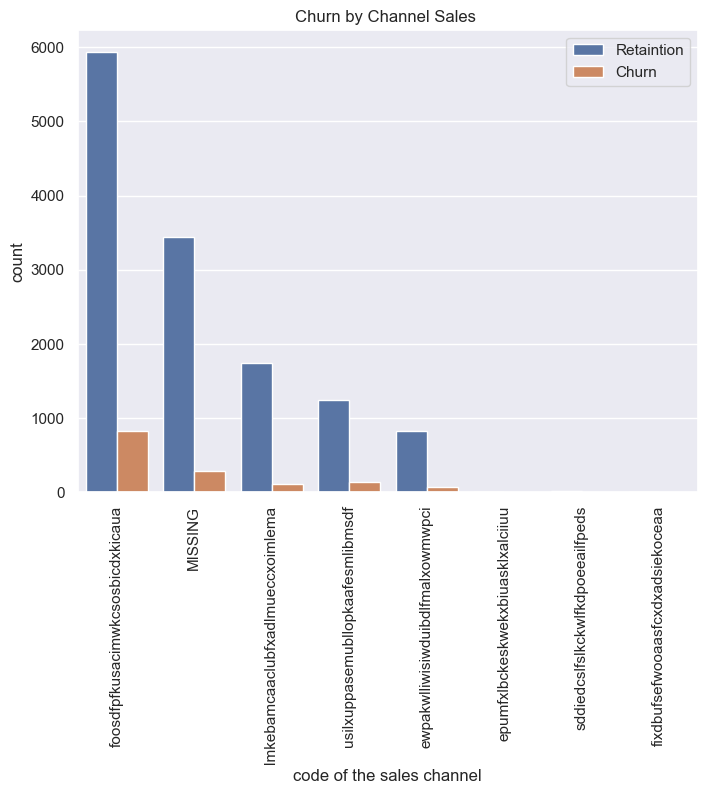

In [25]:
# Visualize churn by channel_sales
plt.figure(figsize=(8, 6))
sns.countplot(x='channel_sales', hue='churn', data=client_df)
plt.legend({'Retaintion':0, 'Churn':1}, loc='upper right')
plt.xlabel('code of the sales channel')
plt.title('Churn by Channel Sales ')
plt.xticks(rotation=90)
plt.show()

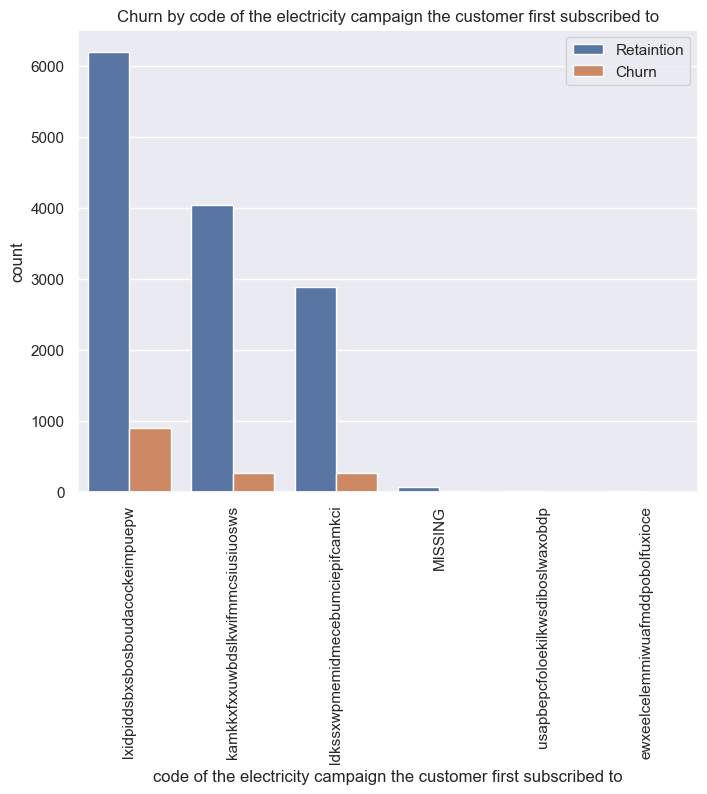

In [26]:
# Visualize churn by origin_up
plt.figure(figsize=(8, 6))
sns.countplot(x='origin_up', hue='churn', data=client_df)
plt.legend({'Retaintion':0, 'Churn':1}, loc='upper right')
plt.title('Churn by code of the electricity campaign the customer first subscribed to')
plt.xlabel('code of the electricity campaign the customer first subscribed to')
plt.xticks(rotation=90)
plt.show()


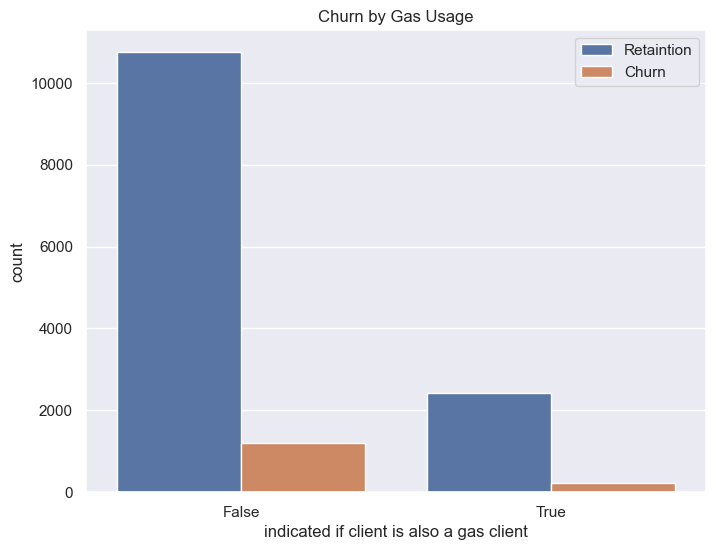

In [27]:
# Visualize churn by gas usage
plt.figure(figsize=(8, 6))
sns.countplot(x='has_gas', hue='churn', data=client_df)
plt.legend({'Retaintion':0, 'Churn':1})
plt.xlabel('indicated if client is also a gas client')
plt.title('Churn by Gas Usage')
plt.show()

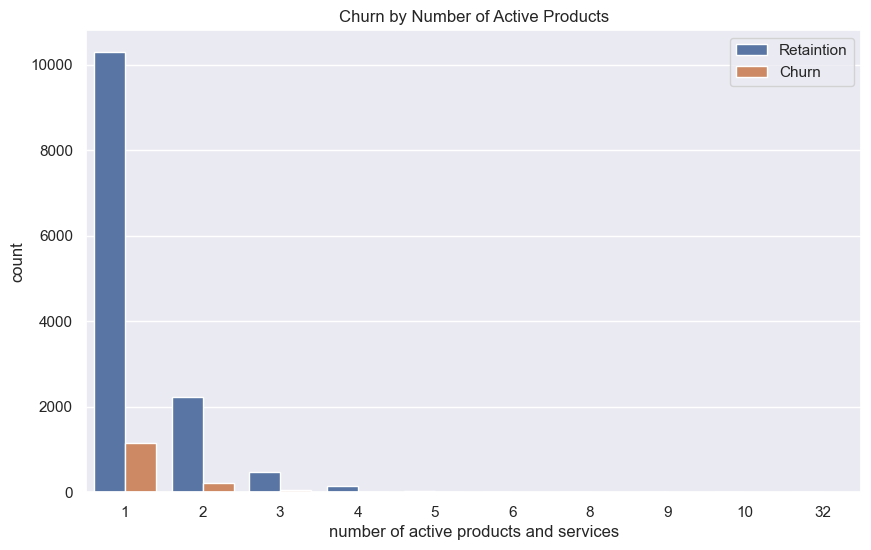

In [28]:
# Visualize churn by number of active products and services
plt.figure(figsize=(10, 6))
sns.countplot(x='nb_prod_act', hue='churn', data=client_df)
plt.legend({'Retaintion':0, 'Churn':1}, loc='upper right')
plt.xlabel('number of active products and services')
plt.title('Churn by Number of Active Products')
plt.show()

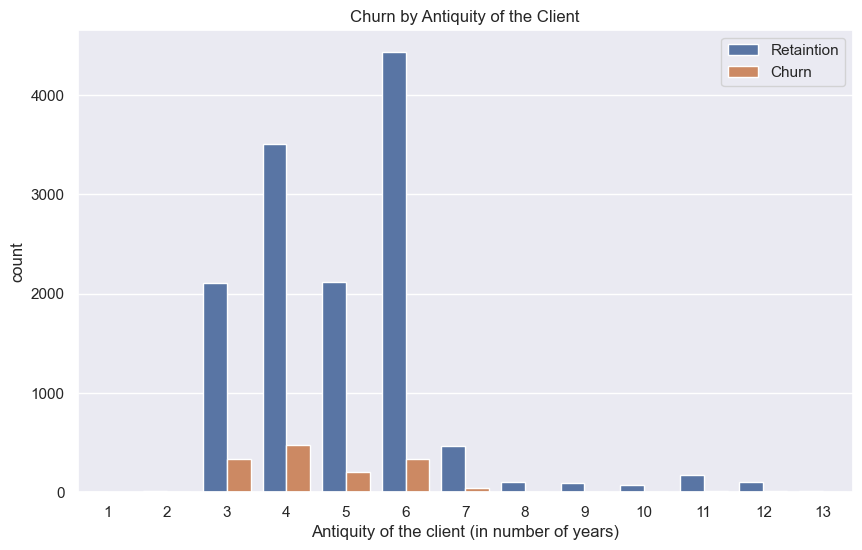

In [29]:
# Visualize churn by antiquity of the client
plt.figure(figsize=(10, 6))
sns.countplot(x='num_years_antig', hue='churn', data=client_df)
plt.legend({'Retaintion':0, 'Churn':1}, loc='upper right')
plt.xlabel('Antiquity of the client (in number of years)')
plt.title('Churn by Antiquity of the Client')
plt.show()

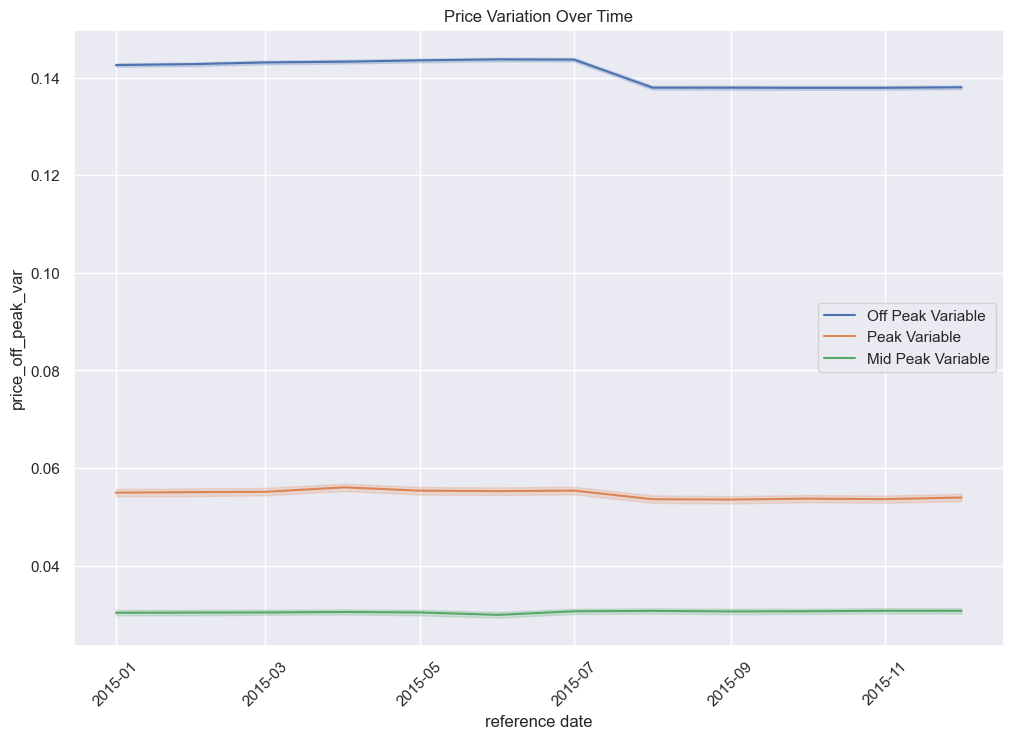

In [30]:
# Visualize price variation over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='price_date', y='price_off_peak_var', data=price_df, label='Off Peak Variable')
sns.lineplot(x='price_date', y='price_peak_var', data=price_df, label='Peak Variable')
sns.lineplot(x='price_date', y='price_mid_peak_var', data=price_df, label='Mid Peak Variable')
plt.title('Price Variation Over Time')
plt.xlabel('reference date')
plt.xticks(rotation=45)
plt.show()

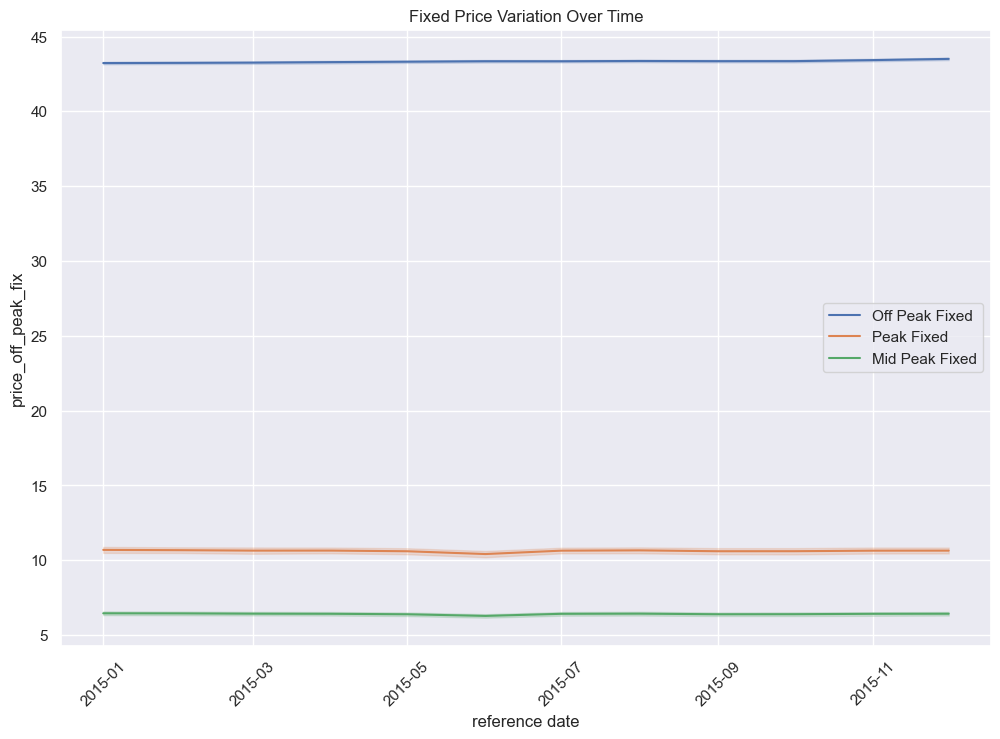

In [31]:
# Visualize fixed prices over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='price_date', y='price_off_peak_fix', data=price_df, label='Off Peak Fixed')
sns.lineplot(x='price_date', y='price_peak_fix', data=price_df, label='Peak Fixed')
sns.lineplot(x='price_date', y='price_mid_peak_fix', data=price_df, label='Mid Peak Fixed')
plt.title('Fixed Price Variation Over Time')
plt.xlabel('reference date')
plt.xticks(rotation=45)
plt.show()

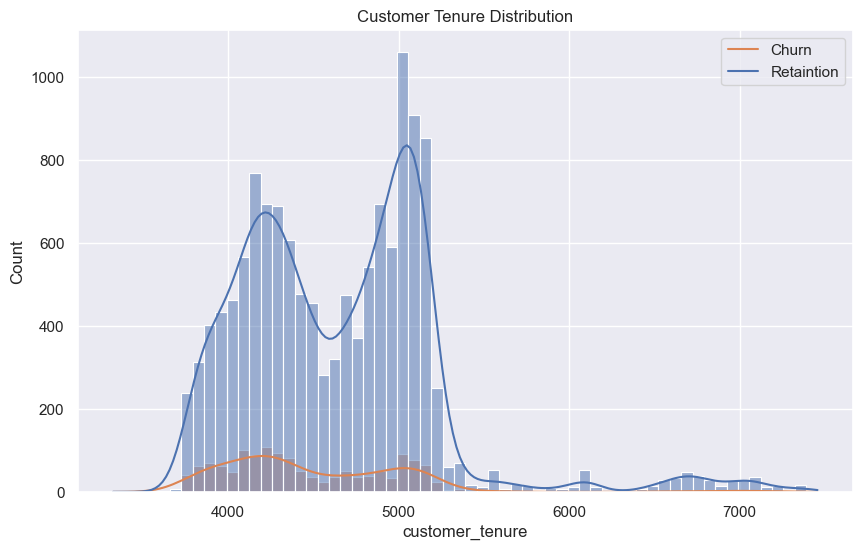

In [32]:
# Convert date_activ column to datetime format
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])

# Calculate customer tenure
client_df['customer_tenure'] = (pd.to_datetime('today') - client_df['date_activ']).dt.days


# Visualize tenure distribution for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=client_df, x='customer_tenure', hue='churn', kde=True, legend= True)
plt.title('Customer Tenure Distribution')
plt.legend({'Churn':1,'Retaintion':0})
plt.show()


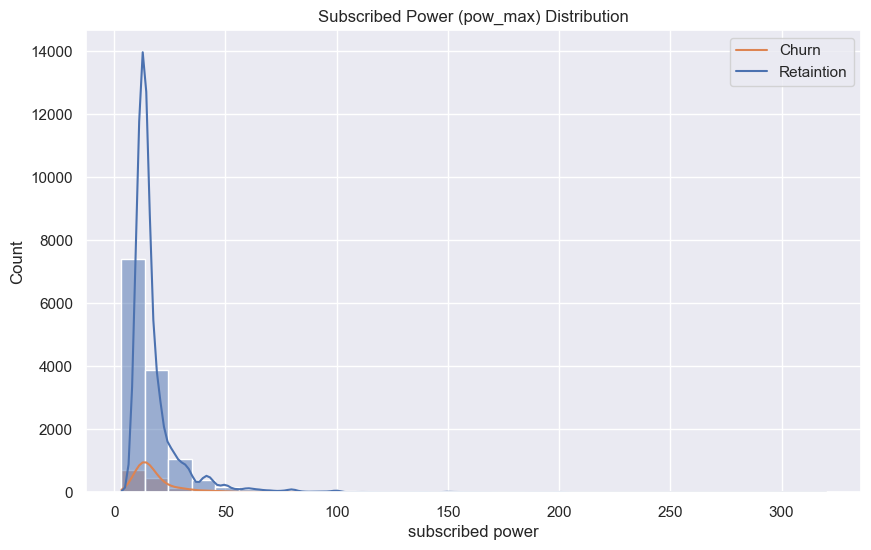

In [33]:
# Visualize distribution of subscribed power (pow_max)
plt.figure(figsize=(10, 6))
sns.histplot(data=client_df, x='pow_max', hue='churn', bins=30,  kde=True)
plt.legend({'Churn':1,'Retaintion':0})
plt.xlabel('subscribed power')
plt.title('Subscribed Power (pow_max) Distribution')
plt.show()

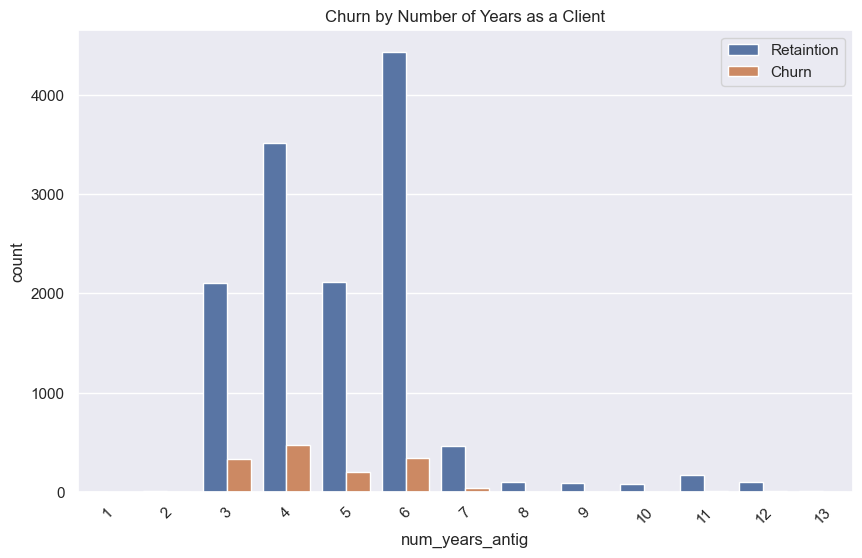

In [34]:
# Visualize churn by number of years as a client (num_years_antig)
plt.figure(figsize=(10, 6))
sns.countplot(x='num_years_antig', hue='churn', data=client_df)
plt.legend({'Retaintion':0, 'Churn':1,})
plt.title('Churn by Number of Years as a Client')
plt.xticks(rotation=45)
plt.show()

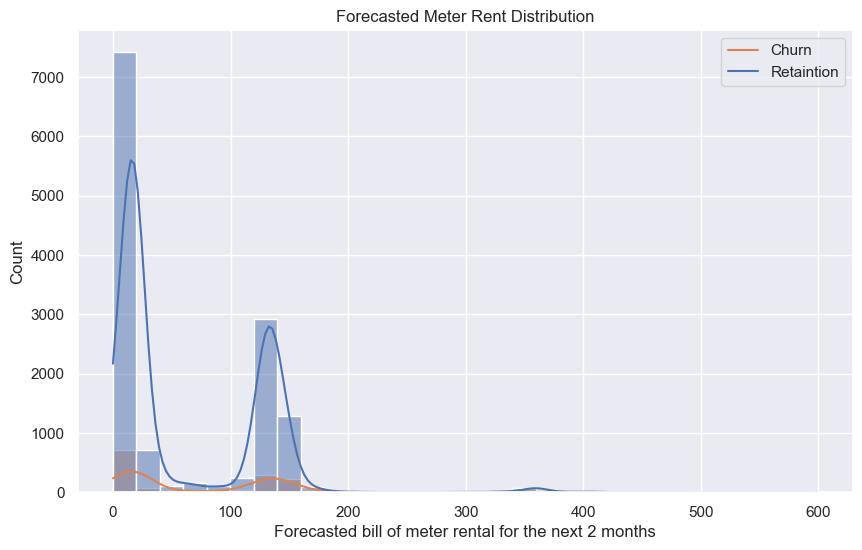

In [35]:
# Visualize churn by forecasted meter rent for the next 2 months
plt.figure(figsize=(10, 6))
sns.histplot(data=client_df, x='forecast_meter_rent_12m', hue='churn', kde=True, bins=30)
plt.legend({'Churn':1,'Retaintion':0})
plt.xlabel('Forecasted bill of meter rental for the next 2 months')
plt.title('Forecasted Meter Rent Distribution')
plt.show()

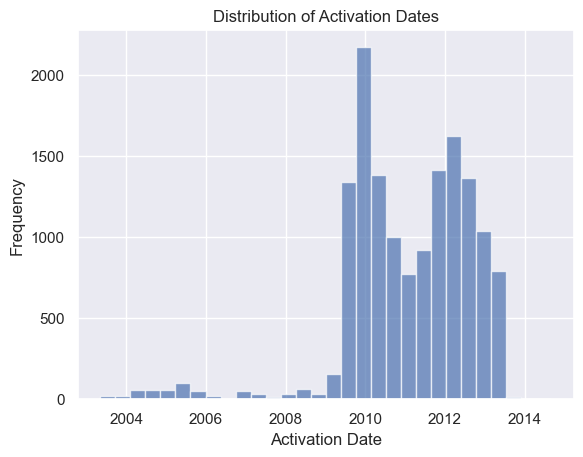

In [36]:
# Convert date columns to datetime format and plot time series
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_activ'].hist(bins=30, color='b', alpha=0.7)
plt.xlabel('Activation Date')
plt.ylabel('Frequency')
plt.title('Distribution of Activation Dates')
plt.show()


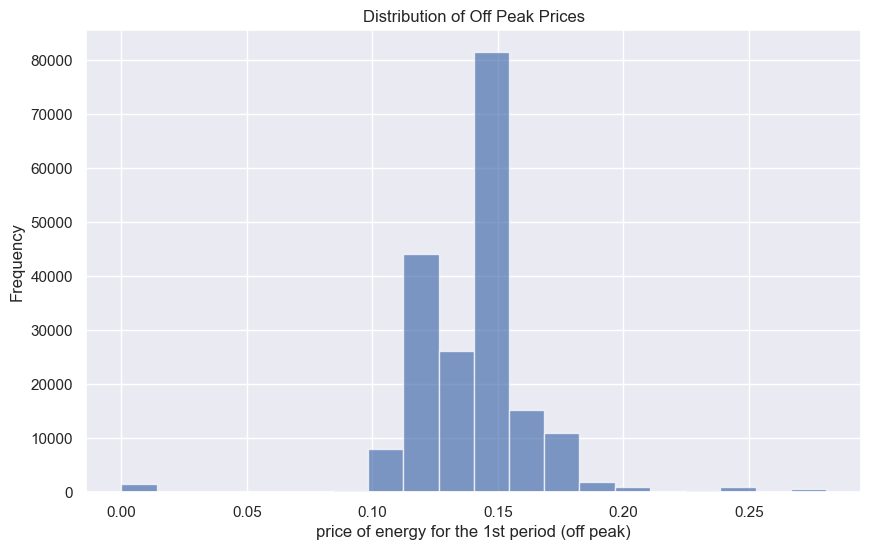

In [37]:
# Histogram of price_off_peak_var
plt.figure(figsize=(10, 6))
plt.hist(price_df['price_off_peak_var'], bins=20, color='b', alpha=0.7)
plt.xlabel('price of energy for the 1st period (off peak)')
plt.ylabel('Frequency')
plt.title('Distribution of Off Peak Prices')
plt.show()


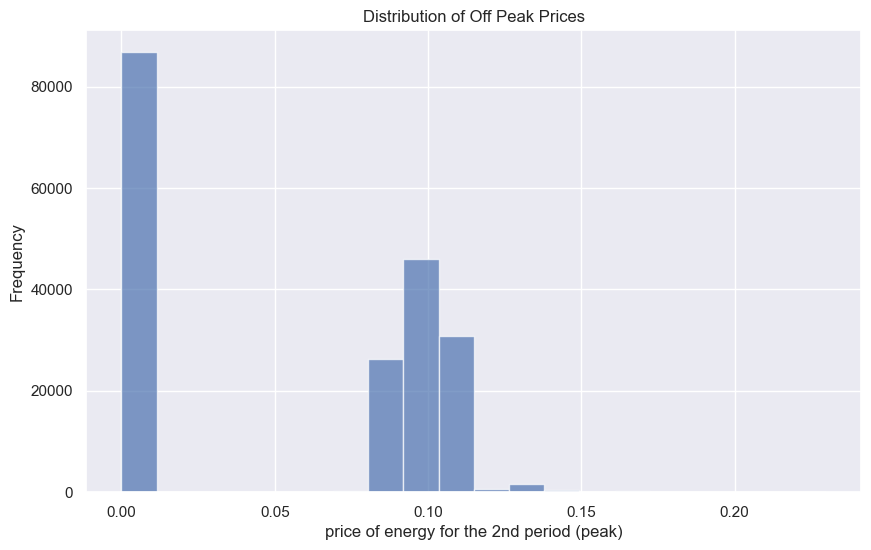

In [38]:
# Histogram of price_off_peak_var
plt.figure(figsize=(10, 6))
plt.hist(price_df['price_peak_var'], bins=20, color='b', alpha=0.7)
plt.xlabel('price of energy for the 2nd period (peak)')
plt.ylabel('Frequency')
plt.title('Distribution of Off Peak Prices')
plt.show()

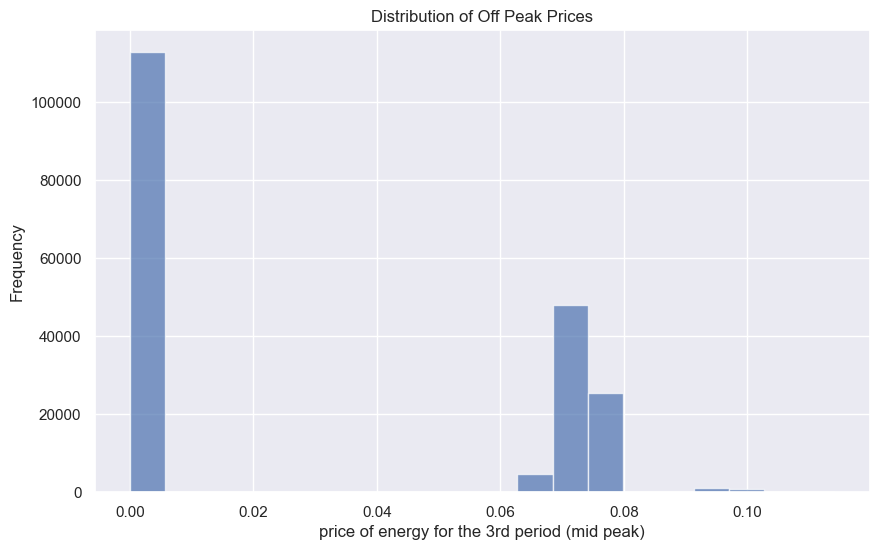

In [39]:
# Histogram of price_off_peak_var
plt.figure(figsize=(10, 6))
plt.hist(price_df['price_mid_peak_var'], bins=20, color='b', alpha=0.7)
plt.xlabel('price of energy for the 3rd period (mid peak)')
plt.ylabel('Frequency')
plt.title('Distribution of Off Peak Prices')
plt.show()

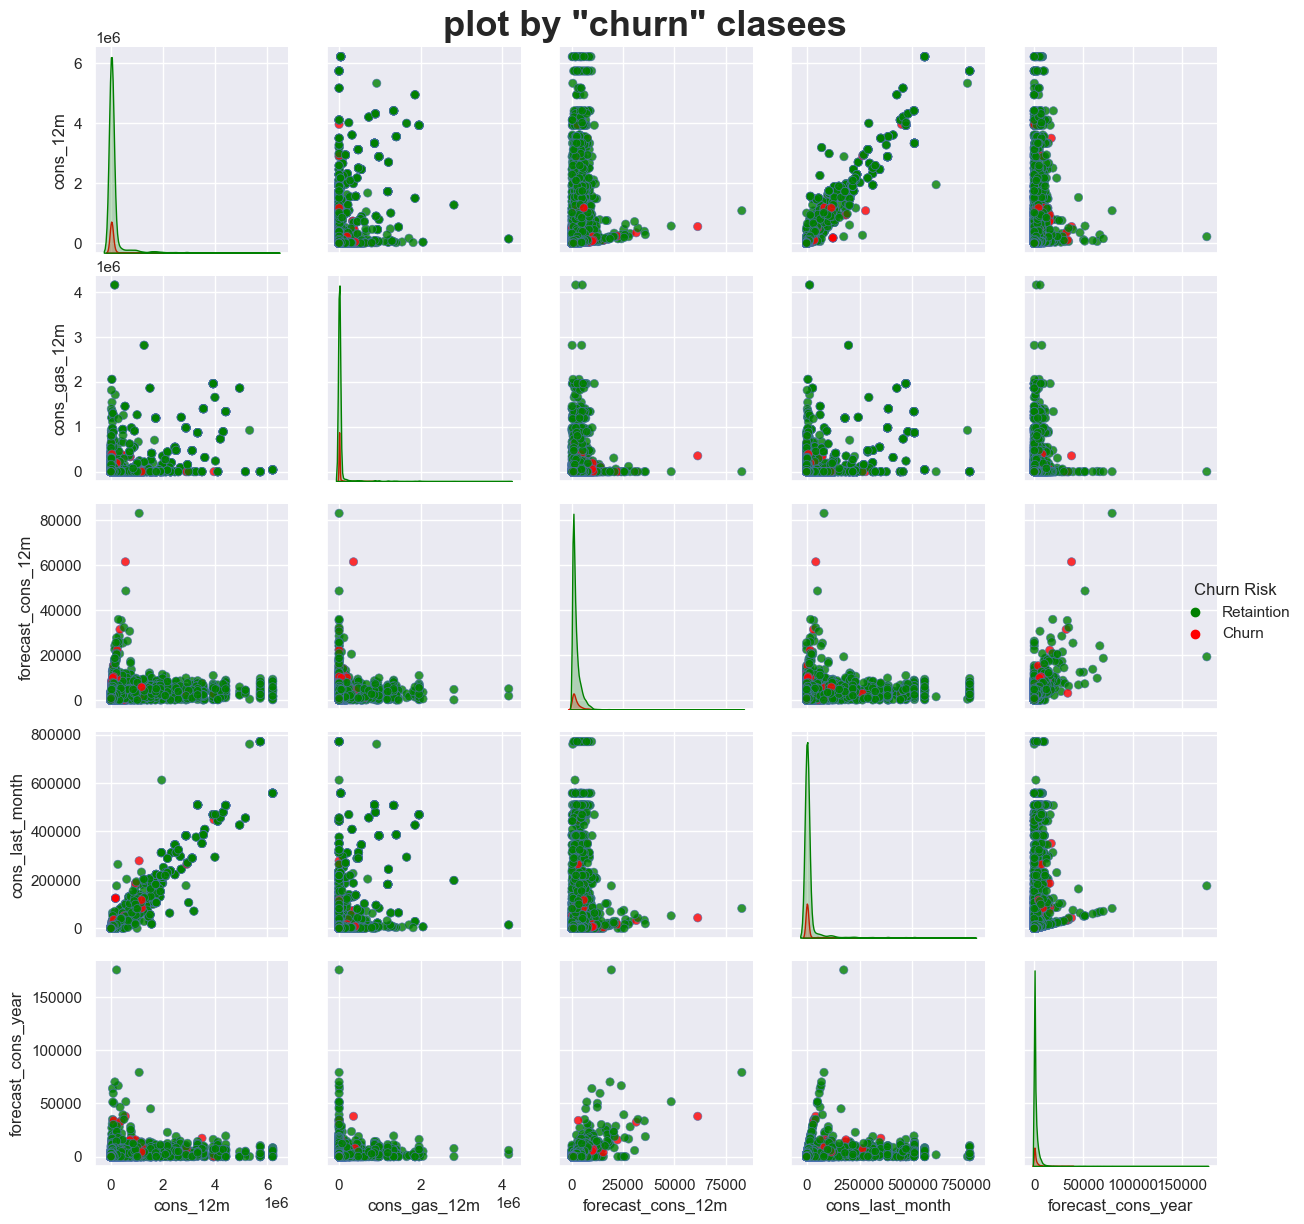

In [40]:
g = sns.pairplot(client_df, hue='churn',
                 vars = ['cons_12m','cons_gas_12m','forecast_cons_12m','cons_last_month','forecast_cons_year'],
                palette={0 :'green',
                        1:'red'},
                plot_kws={'alpha':0.8, 'edgecolor':'b', 'linewidth': 0.5})
fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('plot by "churn" clasees',
            fontsize=26,
            fontweight='bold')
# Update the Legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)

# replace labels
new_labels = ['Retaintion', 'Churn']
for t, I in zip(g._legend.texts, new_labels): t.set_text(I)
plt.show()

In [41]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

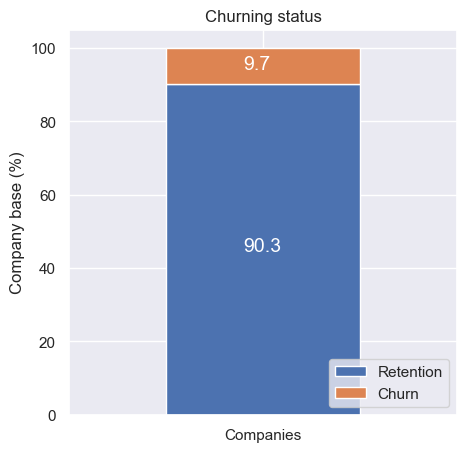

In [42]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

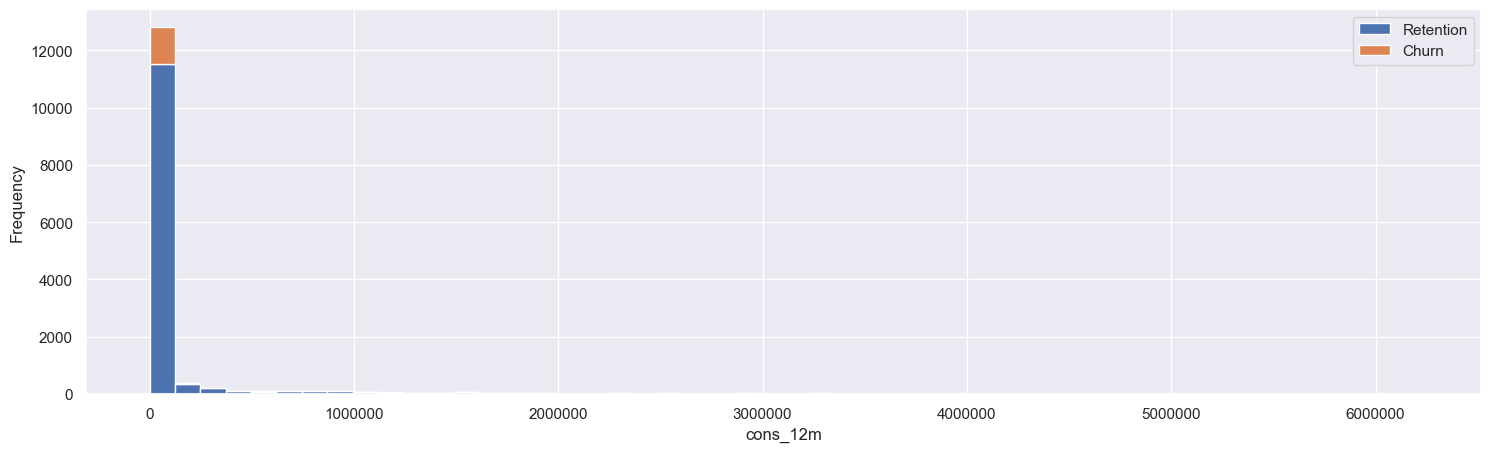

In [43]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)